In [1]:
#Step 1: Data Exploration
#1.1 Load the Dataset & Check
import pandas as pd

# Load the dataset directly from UCI (hosted as .data file)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns)

# Basic info
print("Shape of the dataset:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData types and non-null counts:")
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())

Shape of the dataset: (1728, 7)

First few rows:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

Missing values in each column:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safe

In [2]:
#Step 2: Data Cleaning
#2.1 Handle Missing Values
#We already checked — there are no missing values, so we can skip imputation.

#2.2 Convert Categorical Variables to Numeric



from sklearn.preprocessing import LabelEncoder

# Create a copy to preserve original
df_cleaned = df.copy()

# Apply Label Encoding
le = LabelEncoder()
for col in df_cleaned.columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Check the transformed dataset
print(df_cleaned.head())

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [4]:
#Step 3: Target Variable Understanding
#3.1 Meaning of Target Values

#The class column (target variable) contains the following categories:

#unacc: unacceptable

#acc: acceptable

#good: good

#vgood: very good

#It’s a multi-class classification problem with 4 classes.



# Original (non-encoded) value counts
print("Target distribution:")
print(df['class'].value_counts())

#3.2 Encode Target Variable
#We’ll convert the class column into numeric labels.
# Encode target separately
target_encoder = LabelEncoder()
df_cleaned['class'] = target_encoder.fit_transform(df['class'])

# Map of encoded values
target_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))
print("Target mapping:",target_mapping)

Target distribution:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
Target mapping: {'acc': np.int64(0), 'good': np.int64(1), 'unacc': np.int64(2), 'vgood': np.int64(3)}


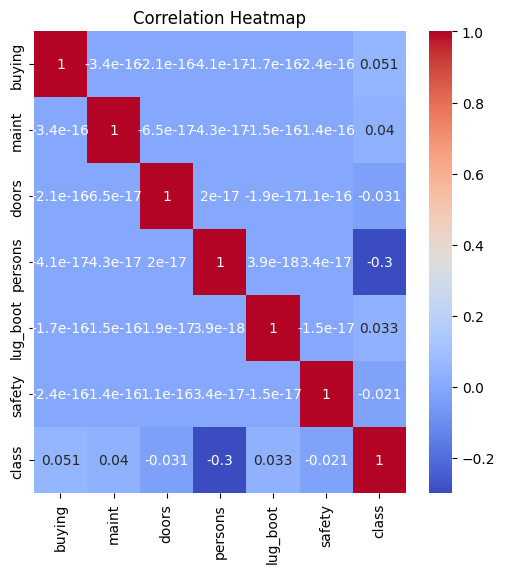

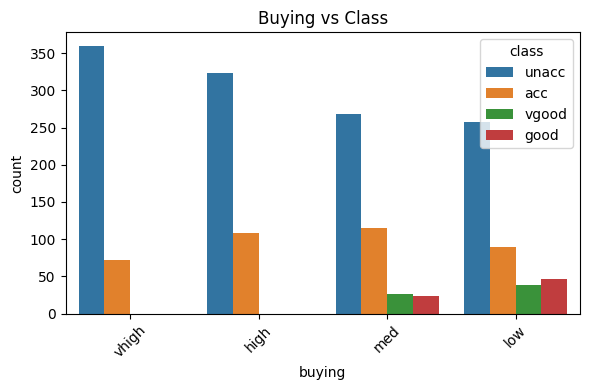

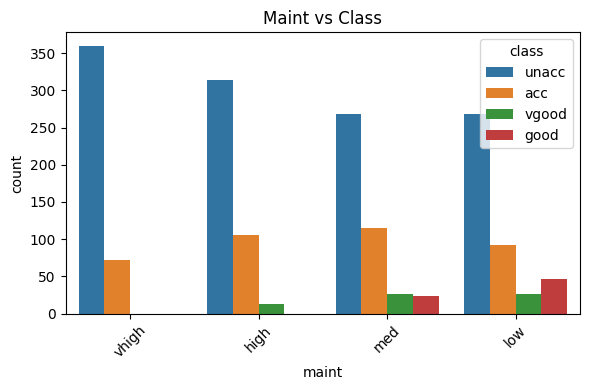

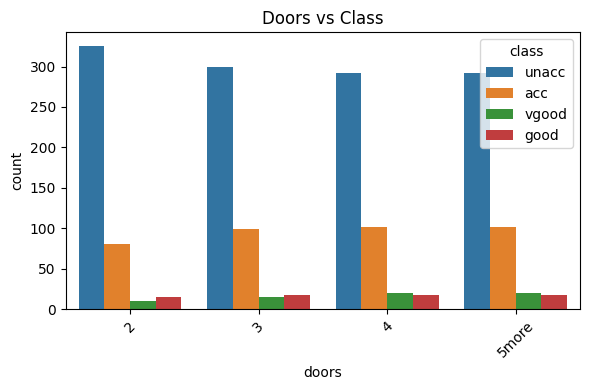

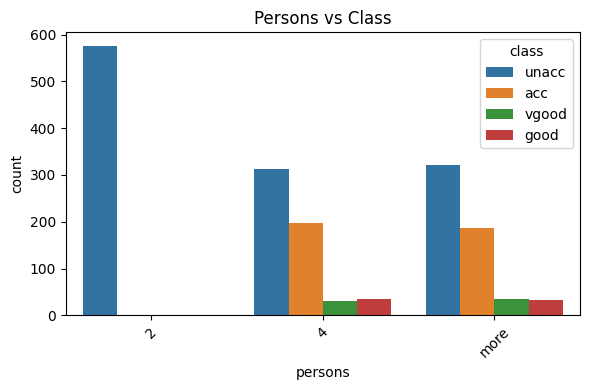

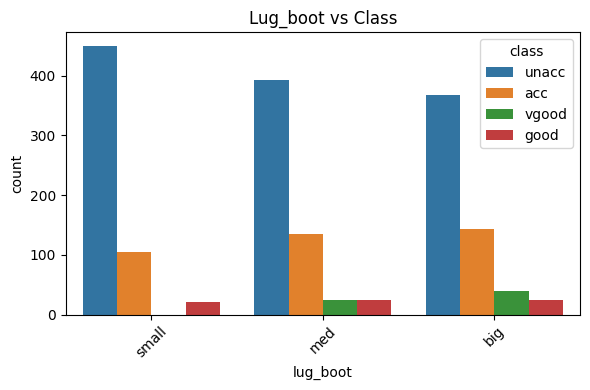

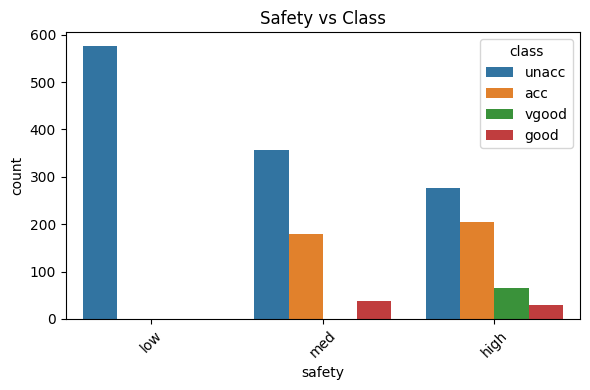

In [6]:
#Step 4: Visualization
#4.1 Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Note: Since all features are encoded from categorical, the correlation might not provide deep insight but still gives a relative sense of influence.



#4.2 Target vs Features
# Convert target column back to original labels for better visualization
df_viz = df.copy()

features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
for feature in features:
  plt.figure(figsize=(6,4))
  sns.countplot(x=feature, hue='class', data=df_viz)
  plt.title(f"{feature.capitalize()} vs Class")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [12]:
#Step 5: Model Training
from sklearn.model_selection import train_test_split

X = df_cleaned.drop( 'class', axis=1 )
y = df_cleaned['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get the class name using type(model).__name__
    print(f"Model: {type(model).__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

# Logistic Regression
lr = LogisticRegression( max_iter=1000 )
evaluate_model(lr)

# Random Forest
rf = RandomForestClassifier( random_state=42 )
evaluate_model( rf )

Model: LogisticRegression
Accuracy: 0.6907514450867052
Precision (macro): 0.30476190476190473
Recall (macro): 0.2965784215784216
F1 Score (macro): 0.2814513675269499

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.08      0.12        77
           1       0.00      0.00      0.00        14
           2       0.73      0.95      0.83       242
           3       0.20      0.15      0.17        13

    accuracy                           0.69       346
   macro avg       0.30      0.30      0.28       346
weighted avg       0.58      0.69      0.61       346

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Model: RandomForestClassifier
Accuracy: 0.9826589595375722
Precision (macro): 0.9724149659863945
Recall (macro): 0.9499250749250749
F1 Score (macro): 0.9607343950224637

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        77
           1       0.93      0.93      0.93        14
           2       0.99      1.00      0.99       242
           3       1.00      0.92      0.96        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346

--------------------------------------------------


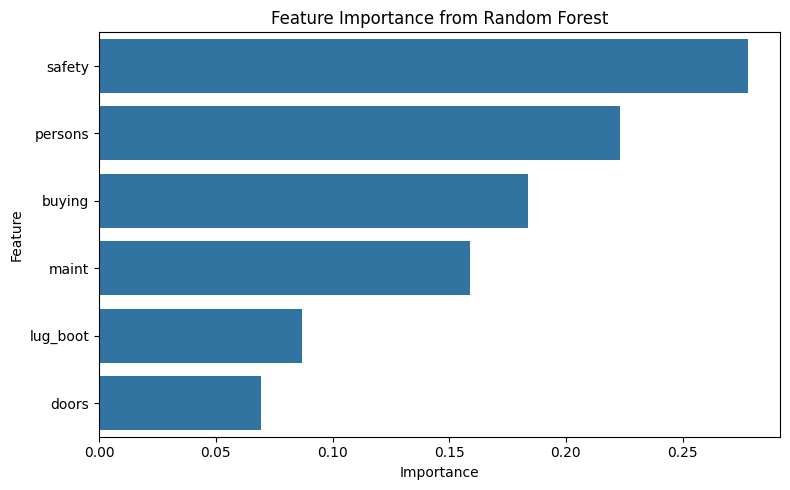

In [13]:
#Step 6: Feature Importance
import pandas as pd

# Fit model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

In [14]:
#Step 7: Model Comparison
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create DataFrame
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 Model  Accuracy  Precision    Recall  F1 Score
2        Decision Tree  0.985549   0.970833  0.956226  0.961547
3        Random Forest  0.982659   0.972415  0.949925  0.960734
1                  KNN  0.910405   0.903267  0.656809  0.727774
0  Logistic Regression  0.690751   0.304762  0.296578  0.281451


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# App Title
st.title("🚗 Car Evaluation Classifier using Random Forest & Streamlit")
st.write("Predict the car condition using Machine Learning based on various features.")
st.markdown("👩‍💻 *Made by: SWATI *")

# Load dataset from fixed path
data_path = "/mnt/data/car.csv"
try:
    df = pd.read_csv(data_path)

    st.subheader("🔍 Dataset Preview")
    st.dataframe(df.head())

    # Encoding categorical columns if needed
    df_encoded = df.apply(lambda col: pd.factorize(col)[0])

    # Splitting data
    X = df_encoded.iloc[:, :-1]
    y = df_encoded.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Accuracy
    accuracy = model.score(X_test, y_test)
    st.success(f"🎯 Model Accuracy: {accuracy*100:.2f}%")

    # Prediction UI
    st.subheader("🧪 Predict Car Condition")

    input_data = []
    for column in df.columns[:-1]:
        value = st.selectbox(f"{column}", df[column].unique())
        input_data.append(value)

    # Convert input to encoded form
    input_encoded = [pd.Series(df[column].unique()).tolist().index(val) for column, val in zip(df.columns[:-1], input_data)]
    prediction = model.predict([input_encoded])[0]

    # Decode prediction
    decoded_label = pd.Series(df[df.columns[-1]].unique())[prediction]
    st.success(f"✅ Predicted Condition: {decoded_label}")

    st.markdown("❤ *Made with love by SWATI 💜 *")

except FileNotFoundError:
    st.error("🚫 The dataset was not found at the specified path: /mnt/data/car.csv")
